In [1]:
import numpy as np #The Numpy numerical computing library
import pandas as pd #The Pandas data science library
import requests #The requests library for HTTP requests in Python
import xlsxwriter #The XlsxWriter libarary for 
import math #The Python math module
from scipy import stats #The SciPy stats module

# Import List of Stocks

In [2]:
stocks = pd.read_csv('data/sp_500_stocks.csv')
stocks.head()

,Ticker
0,A
1,AAL
2,AAP
3,AAPL
4,ABBV


# API

In [3]:
from secrets import IEX_CLOUD_API_TOKEN

# Obtain  Market Cap and Price from API

In [4]:
# Example with one stock
TOKEN = 'pk_69e2a28a3dc64766a3202857c0ce4e8e'
symbol = 'AAPL'
api_url = f'https://sandbox.iexapis.com/stable/stock/{symbol}/quote?token={IEX_CLOUD_API_TOKEN}'
data = requests.get(api_url).json()
data

{'avgTotalVolume': 106767717,
 'calculationPrice': 'tops',
 'change': -1.23,
 'changePercent': -0.00674,
 'close': 0,
 'closeSource': 'iclifofa',
 'closeTime': None,
 'companyName': 'Apple Inc',
 'currency': 'USD',
 'delayedPrice': None,
 'delayedPriceTime': None,
 'extendedChange': None,
 'extendedChangePercent': None,
 'extendedPrice': None,
 'extendedPriceTime': None,
 'high': 0,
 'highSource': None,
 'highTime': None,
 'iexAskPrice': 176.8,
 'iexAskSize': 102,
 'iexBidPrice': 174.92,
 'iexBidSize': 311,
 'iexClose': 177.68,
 'iexCloseTime': 1708666954951,
 'iexLastUpdated': 1678553993089,
 'iexMarketPercent': 0.015605069811291627,
 'iexOpen': 181.563,
 'iexOpenTime': 1671067692505,
 'iexRealtimePrice': 180.62,
 'iexRealtimeSize': 103,
 'iexVolume': 921904,
 'lastTradeTime': 1667204900575,
 'latestPrice': 183.18,
 'latestSource': 'IEX real time price',
 'latestTime': '3:25:26 PM',
 'latestUpdate': 1702390633389,
 'latestVolume': None,
 'low': 0,
 'lowSource': None,
 'lowTime': None,

In [10]:
symbol = 'DNZOY'
api_url = f'https://sandbox.iexapis.com/stable/stock/{symbol}/quote?token={IEX_CLOUD_API_TOKEN}'
data = requests.get(api_url).json()
data

{'avgTotalVolume': 52159,
 'calculationPrice': 'previousclose',
 'change': 0,
 'changePercent': 0,
 'close': 0,
 'closeSource': 'aflicfio',
 'closeTime': None,
 'companyName': 'Denso Corporation - ADR',
 'currency': 'USD',
 'delayedPrice': None,
 'delayedPriceTime': None,
 'extendedChange': None,
 'extendedChangePercent': None,
 'extendedPrice': None,
 'extendedPriceTime': None,
 'high': 0,
 'highSource': None,
 'highTime': None,
 'iexAskPrice': None,
 'iexAskSize': None,
 'iexBidPrice': None,
 'iexBidSize': None,
 'iexClose': None,
 'iexCloseTime': None,
 'iexLastUpdated': None,
 'iexMarketPercent': None,
 'iexOpen': None,
 'iexOpenTime': None,
 'iexRealtimePrice': None,
 'iexRealtimeSize': None,
 'iexVolume': None,
 'lastTradeTime': 1645281668195,
 'latestPrice': 37.5,
 'latestSource': 'Previous close',
 'latestTime': 'February 2, 2022',
 'latestUpdate': 1695305584738,
 'latestVolume': 0,
 'low': 0,
 'lowSource': None,
 'lowTime': None,
 'marketCap': 61203880489,
 'oddLotDelayedPrice

In [7]:
#Price
price = data['latestPrice']
price

169.07

In [8]:
pe_ratio = data['peRatio']
pe_ratio

14.9

In [9]:
# Function sourced from 
# https://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]   
        
symbol_groups = list(chunks(stocks['Ticker'], 100))
symbol_strings = []
for i in range(0, len(symbol_groups)):
    symbol_strings.append(','.join(symbol_groups[i]))
#     print(symbol_strings[i])

my_columns = ['Ticker', 'Price', 'Price-to-Earnings Ratio']

In [10]:
symbol_strings

['A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BAX,BBY,BDX,BEN,BF.B,BIIB,BIO,BK,BKNG,BKR,BLK,BLL,BMY,BR,BRK.B,BSX,BWA,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CE,CERN,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA',
 'CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COO,COP,COST,COTY,CPB,CPRT,CRM,CSCO,CSX,CTAS,CTL,CTSH,CTVA,CTXS,CVS,CVX,CXO,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DLR,DLTR,DOV,DOW,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,ES,ESS,ETFC,ETN,ETR,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FB,FBHS,FCX,FDX,FE,FFIV,FIS,FISV,FITB,FLIR,FLS,FLT,FMC,FOX,FOXA,FRC,FRT,FTI,FTNT,FTV,GD,GE,GILD',
 'GIS,GL,GLW,GM,GOOG,GOOGL,GPC,GPN,GPS,GRMN,GS,GWW,HAL,HAS,HBAN,HBI,HCA,HD,HES,HFC,HIG,HII,HLT,HOLX,HON,HPE,HPQ,HRB,HRL,HSIC,HST,HSY,HUM,HWM,IBM,ICE,IDXX,I

In [11]:
df = pd.DataFrame(columns = my_columns)
for symbol_string in symbol_strings:
    batch_api_call_url = f'https://sandbox.iexapis.com/stable/stock/market/batch/?types=quote&symbols={symbol_string}&token={IEX_CLOUD_API_TOKEN}'
    data = requests.get(batch_api_call_url).json()
    for  symbol in symbol_string.split(','):
        df = df.append(
                                        pd.Series([symbol, 
                                                   data[symbol]['quote']['latestPrice'],
                                                   data[symbol]['quote']['peRatio']
                                                   ], 
                                                  index = my_columns), 
                                        ignore_index = True)
        
df
        

,Ticker,Price,Price-to-Earnings Ratio
0,A,144.65,18.54
1,AAL,17.59,-3.6
2,AAP,244.98,24.68
3,AAPL,167.79,15
4,ABBV,138.96,33.55
...,...,...,...
499,YUM,127.30,24.15
500,ZBH,125.55,32.7
501,ZBRA,530.83,34.28
502,ZION,67.71,6.55


In [12]:
df.sort_values('Price-to-Earnings Ratio', inplace = True)
df = df[df['Price-to-Earnings Ratio'] > 0]
df = df[:50]
df.reset_index(inplace = True)
df.drop('index', axis=1, inplace = True)

In [13]:
df

,Ticker,Price,Price-to-Earnings Ratio
0,BIO,617.09,2.82
1,HPE,16.75,3.4
2,COO,402.46,3.44
3,HPQ,37.50,3.5
4,EBAY,65.16,3.57
5,DHI,92.84,3.98
6,NRG,40.58,4
7,BEN,35.15,4.75
8,HOLX,72.77,5.13
9,MPC,74.46,5.28


In [14]:
symbol = 'AAPL'
api_url = f'https://sandbox.iexapis.com/stable/stock/{symbol}/quote?token={IEX_CLOUD_API_TOKEN}'
data = requests.get(api_url).json()
data


{'avgTotalVolume': 87048498,
 'calculationPrice': 'close',
 'change': -3.62,
 'changePercent': -0.02195,
 'close': 171.66,
 'closeSource': 'oiilcaff',
 'closeTime': 1688377093526,
 'companyName': 'Apple Inc',
 'currency': 'USD',
 'delayedPrice': 168.33,
 'delayedPriceTime': 1671279263156,
 'extendedChange': -0.45,
 'extendedChangePercent': -0.00277,
 'extendedPrice': 170.57,
 'extendedPriceTime': 1702659646793,
 'high': 177.05,
 'highSource': 'entulmedapye1de5i  ic r',
 'highTime': 1653099396519,
 'iexAskPrice': 0,
 'iexAskSize': 0,
 'iexBidPrice': 0,
 'iexBidSize': 0,
 'iexClose': 167.44,
 'iexCloseTime': 1670521552569,
 'iexLastUpdated': 1664125487318,
 'iexMarketPercent': 0.01152842835523377,
 'iexOpen': 171.29,
 'iexOpenTime': 1664442051270,
 'iexRealtimePrice': 165.72,
 'iexRealtimeSize': 73,
 'iexVolume': 1100994,
 'lastTradeTime': 1681331682349,
 'latestPrice': 166.59,
 'latestSource': 'Close',
 'latestTime': 'January 19, 2022',
 'latestUpdate': 1654961157463,
 'latestVolume': 9

In [26]:
# Example with one stock
symbol2 = 'AAPL'
api_url2 = f'https://sandbox.iexapis.com/stable/stock/{symbol2}/chart/1y?token={IEX_CLOUD_API_TOKEN}'
data2 = requests.get(api_url2).json()
print(data2)


[{'close': 132.4, 'high': 136.6, 'low': 131.64, 'open': 133.14, 'symbol': 'AAPL', 'volume': 108038045, 'id': 'I_AROCTIELPSCRISH', 'key': 'ALPA', 'subkey': '', 'date': '2021-01-20', 'updated': 1644998623871, 'changeOverTime': 0, 'marketChangeOverTime': 0, 'uOpen': 134.41, 'uClose': 137, 'uHigh': 137.66, 'uLow': 132.02, 'uVolume': 105422771, 'fOpen': 130.9635, 'fClose': 136.427, 'fHigh': 136.1914, 'fLow': 130.3897, 'fVolume': 104329135, 'label': 'Jan 20, 21', 'change': 0, 'changePercent': 0}, {'close': 139.21, 'high': 144.84, 'low': 135.07, 'open': 137.8, 'symbol': 'AAPL', 'volume': 121892440, 'id': 'CLRSOHC_IAETPISIR', 'key': 'AAPL', 'subkey': '', 'date': '2021-01-21', 'updated': 1698775556221, 'changeOverTime': 0.03763862426083104, 'marketChangeOverTime': 0.0381140169942408, 'uOpen': 138.3, 'uClose': 141.71, 'uHigh': 143.94, 'uLow': 134.31, 'uVolume': 123009673, 'fOpen': 135.4365, 'fClose': 142.1354, 'fHigh': 141.4532, 'fLow': 137.6495, 'fVolume': 121651925, 'label': 'Jan 21, 21', 'cha

In [ ]:
data['close']

In [31]:
tickers = df.Ticker.values.tolist()


In [32]:
tickers

['BIO',
 'HPE',
 'COO',
 'HPQ',
 'EBAY',
 'DHI',
 'NRG',
 'BEN',
 'HOLX',
 'MPC',
 'TSN',
 'COF',
 'LYB',
 'GS',
 'C',
 'PRU',
 'ZION',
 'NUE',
 'SYF',
 'WHR',
 'VIAC',
 'CE',
 'AIZ',
 'UNM',
 'DFS',
 'WBA',
 'GM',
 'CINF',
 'LEN',
 'WRK',
 'DOW',
 'DD',
 'RJF',
 'SWKS',
 'KSS',
 'PHM',
 'DISH',
 'DGX',
 'NLSN',
 'SLG',
 'RF',
 'MOS',
 'ABC',
 'IVZ',
 'JPM',
 'AIG',
 'LH',
 'REGN',
 'WU',
 'BBY']

In [ ]:
aapl = pd.DataFrame(data)
aapl

In [61]:

def get_historic_data(symbol):
    ticker = symbol
    iex_api_key = IEX_CLOUD_API_TOKEN
    api_url = f'https://sandbox.iexapis.com/stable/stock/{ticker}/chart/5Y?token={iex_api_key}'
    df = requests.get(api_url).json()
    
    date = []
    close = []
    
    for i in range(len(df)):
        date.append(df[i]['date'])
        close.append(df[i]['close'])
    
    
    date_df = pd.DataFrame(date).rename(columns = {0:'date'})
    close_df = pd.DataFrame(close).rename(columns = {0:symbol})
    
    frames = [date_df, close_df]
    df = pd.concat(frames, axis = 1, join = 'inner')
    df = df.set_index('date')
    
    return df

fd= get_historic_data('AAPL')

In [62]:
fd

,AAPL
date,
2017-01-20,31.0000
2017-01-23,30.2400
2017-01-24,30.6864
2017-01-25,31.9700
2017-01-26,31.7270
...,...
2022-01-12,184.1000
2022-01-13,174.0000
2022-01-14,174.0000


In [69]:
tesla = get_historic_data('TSLA')

In [70]:
tesla

,TSLA
date,
2017-01-20,50.284
2017-01-23,51.610
2017-01-24,51.158
2017-01-25,52.074
2017-01-26,51.509
...,...
2022-01-12,1121.250
2022-01-13,1036.160
2022-01-14,1096.070


In [75]:
fd=fd.join(tesla)

In [72]:
bio=get_historic_data('BIO')

In [76]:
fd

,AAPL,TSLA
date,,
2017-01-20,31.0000,50.284
2017-01-23,30.2400,51.610
2017-01-24,30.6864,51.158
2017-01-25,31.9700,52.074
2017-01-26,31.7270,51.509
...,...,...
2022-01-12,184.1000,1121.250
2022-01-13,174.0000,1036.160
2022-01-14,174.0000,1096.070


In [78]:
fd=fd.join(bio)

In [79]:
fd

,AAPL,TSLA,BIO
date,,,
2017-01-20,31.0000,50.284,190.32
2017-01-23,30.2400,51.610,185.93
2017-01-24,30.6864,51.158,189.50
2017-01-25,31.9700,52.074,196.10
2017-01-26,31.7270,51.509,195.11
...,...,...,...
2022-01-12,184.1000,1121.250,670.50
2022-01-13,174.0000,1036.160,654.45
2022-01-14,174.0000,1096.070,652.65


In [33]:
len(tickers)

50

In [81]:
tickers2 = ['HPE','COO',
 'HPQ',
 'EBAY']

In [82]:
tickers2

['HPE', 'COO', 'HPQ', 'EBAY']

In [93]:
c = 1
for ticker in tickers:
    if c == 1:
        prices =get_historic_data(ticker)
    else:
        x = get_historic_data(ticker)
        prices = prices.join(x)
    c = 0
    

In [94]:
prices

,BIO,HPE,COO,HPQ,EBAY,DHI,NRG,BEN,HOLX,MPC,...,RF,MOS,ABC,IVZ,JPM,AIG,LH,REGN,WU,BBY
date,,,,,,,,,,,,,,,,,,,,,
2017-01-20,194.91,17.9134,185.15,15.30,30.94,29.38,16.16,42.03,40.55,50.00,...,14.74,31.51,84.25,30.89,85.91,68.45,136.00,376.77,21.25,45.09
2017-01-23,185.93,17.6710,186.57,15.40,31.54,28.93,17.00,42.10,40.93,51.15,...,14.05,32.66,86.92,30.54,85.04,65.90,138.85,361.33,21.45,45.28
2017-01-24,186.10,17.3229,183.07,15.65,31.43,31.07,16.77,42.79,41.23,51.96,...,14.36,34.16,88.53,31.94,86.54,66.80,137.06,363.55,20.66,44.45
2017-01-25,195.60,17.4494,185.80,15.65,30.62,31.89,17.17,42.19,41.80,50.31,...,14.79,33.90,87.72,31.31,86.04,66.96,136.49,363.96,20.17,45.91
2017-01-26,190.46,17.6908,188.52,15.05,33.06,32.07,16.96,41.22,41.77,51.08,...,15.40,32.65,85.55,30.00,90.48,68.42,134.13,341.19,19.79,46.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,672.90,17.7000,441.60,39.03,65.55,102.10,42.94,36.42,75.24,73.08,...,25.43,42.86,141.42,25.85,172.03,64.18,292.91,662.05,18.76,105.73
2022-01-13,643.38,17.9700,432.37,39.30,66.38,102.83,42.90,36.49,73.34,76.12,...,26.23,43.27,140.20,25.69,170.81,64.96,283.31,643.27,19.25,106.70
2022-01-14,655.09,17.8200,411.13,39.10,64.86,101.55,41.06,35.77,69.93,77.91,...,26.07,44.29,136.70,25.96,163.15,64.74,277.53,619.02,18.80,101.10


In [91]:
for t in tickers2:
    x = get_historic_data(t)
    print(x)
    fd=fd.join(x)
    

                HPE
date               
2017-01-20  17.7257
2017-01-23  17.0100
2017-01-24  17.2449
2017-01-25  18.0686
2017-01-26  17.7448
...             ...
2022-01-12  17.4000
2022-01-13  18.2100
2022-01-14  18.0100
2022-01-18  17.3700
2022-01-19  17.1100

[1259 rows x 1 columns]
               COO
date              
2017-01-20  190.51
2017-01-23  189.39
2017-01-24  185.75
2017-01-25  185.50
2017-01-26  188.44
...            ...
2022-01-12  429.20
2022-01-13  426.56
2022-01-14  428.42
2022-01-18  418.57
2022-01-19  405.68

[1259 rows x 1 columns]
              HPQ
date             
2017-01-20  15.33
2017-01-23  14.80
2017-01-24  15.37
2017-01-25  15.77
2017-01-26  14.98
...           ...
2022-01-12  39.84
2022-01-13  39.70
2022-01-14  38.93
2022-01-18  37.81
2022-01-19  37.00

[1259 rows x 1 columns]
             EBAY
date             
2017-01-20  31.98
2017-01-23  30.68
2017-01-24  30.74
2017-01-25  31.29
2017-01-26  33.07
...           ...
2022-01-12  64.52
2022-01-13  64.76
2022

In [95]:
fd

,AAPL,TSLA,BIO,HPE,COO,HPQ,EBAY
date,,,,,,,
2017-01-20,31.0000,50.284,190.32,17.7257,190.51,15.33,31.98
2017-01-23,30.2400,51.610,185.93,17.0100,189.39,14.80,30.68
2017-01-24,30.6864,51.158,189.50,17.2449,185.75,15.37,30.74
2017-01-25,31.9700,52.074,196.10,18.0686,185.50,15.77,31.29
2017-01-26,31.7270,51.509,195.11,17.7448,188.44,14.98,33.07
...,...,...,...,...,...,...,...
2022-01-12,184.1000,1121.250,670.50,17.4000,429.20,39.84,64.52
2022-01-13,174.0000,1036.160,654.45,18.2100,426.56,39.70,64.76
2022-01-14,174.0000,1096.070,652.65,18.0100,428.42,38.93,63.77


In [96]:
rends = prices.pct_change().dropna(axis=0)
rends

,BIO,HPE,COO,HPQ,EBAY,DHI,NRG,BEN,HOLX,MPC,...,RF,MOS,ABC,IVZ,JPM,AIG,LH,REGN,WU,BBY
date,,,,,,,,,,,,,,,,,,,,,
2019-03-21,0.008699,0.024860,0.000066,0.014478,-0.020833,0.011683,0.030916,-0.022353,-0.003245,0.012086,...,-0.046845,-0.023810,0.019512,0.007415,0.001697,0.023303,0.021485,-0.000857,0.057222,0.024370
2019-03-22,-0.031694,-0.045482,-0.007874,-0.013287,-0.010106,0.047420,0.000902,-0.016245,-0.032967,-0.013648,...,-0.070990,-0.045993,-0.027925,-0.023062,-0.047709,-0.051072,-0.046433,-0.012376,0.004204,-0.033170
2019-03-25,0.035331,0.000000,0.020930,-0.047880,0.015314,0.023692,0.002253,0.006116,0.016414,-0.027830,...,0.034533,-0.007670,-0.040367,-0.051231,-0.011166,0.013747,0.024315,0.014888,-0.031920,0.008155
2019-03-26,0.012589,-0.000635,-0.008725,0.034573,0.013496,-0.042392,-0.002697,0.021277,-0.014286,0.010998,...,-0.000710,0.018035,0.015097,0.033351,0.048066,-0.005516,-0.005289,-0.003007,0.024865,0.025105
2019-03-27,-0.023904,0.009536,-0.022534,-0.002025,-0.006527,0.048816,-0.010142,-0.022619,-0.004621,0.023516,...,0.003554,-0.009400,-0.004703,0.007172,-0.041762,0.015022,-0.014622,-0.009344,0.013186,-0.009524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,-0.034258,-0.000565,0.037887,-0.047817,-0.017389,-0.000294,0.042739,-0.012205,0.037936,-0.025470,...,0.020875,0.025850,0.009710,0.018117,-0.002725,0.033162,-0.001125,0.039602,0.002672,-0.016740
2022-01-13,-0.043870,0.015254,-0.020901,0.006918,0.012662,0.007150,-0.000932,0.001922,-0.025253,0.041598,...,0.031459,0.009566,-0.008627,-0.006190,-0.007092,0.012153,-0.032775,-0.028366,0.026119,0.009174
2022-01-14,0.018201,-0.008347,-0.049125,-0.005089,-0.022898,-0.012448,-0.042890,-0.019731,-0.046496,0.023516,...,-0.006100,0.023573,-0.024964,0.010510,-0.044845,-0.003387,-0.020402,-0.037698,-0.023377,-0.052484


In [99]:
import risk_kit as erk

In [100]:
er = erk.annualize_rets(rends,252)
cov = rends.cov()

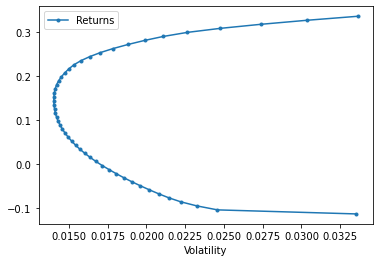

In [105]:
erk.plot_ef(50, er, cov)

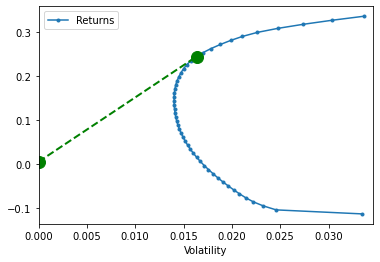

In [106]:
ax = erk.plot_ef(50, er, cov, show_cml=True, riskfree_rate=0.0057)

In [108]:
weights = erk.msr(0.57/100, er, cov )

In [112]:
weights.sum()


1.0000000000163594

In [113]:
prices.columns

Index(['BIO', 'HPE', 'COO', 'HPQ', 'EBAY', 'DHI', 'NRG', 'BEN', 'HOLX', 'MPC',
       'TSN', 'COF', 'LYB', 'GS', 'C', 'PRU', 'ZION', 'NUE', 'SYF', 'WHR',
       'VIAC', 'CE', 'AIZ', 'UNM', 'DFS', 'WBA', 'GM', 'CINF', 'LEN', 'WRK',
       'DOW', 'DD', 'RJF', 'SWKS', 'KSS', 'PHM', 'DISH', 'DGX', 'NLSN', 'SLG',
       'RF', 'MOS', 'ABC', 'IVZ', 'JPM', 'AIG', 'LH', 'REGN', 'WU', 'BBY'],
      dtype='object')

In [115]:
di = {'Ticker': prices.columns, 'Weights': weights}
pd.DataFrame(di)

,Ticker,Weights
0,BIO,2.028610e-01
1,HPE,0.000000e+00
2,COO,8.855933e-13
3,HPQ,3.717036e-02
4,EBAY,9.541407e-02
5,DHI,1.523668e-01
6,NRG,0.000000e+00
7,BEN,0.000000e+00
8,HOLX,7.631880e-13
9,MPC,0.000000e+00
